# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

50a35b6348be28e90d23106ba356aedc


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imper&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=grytviken
Processing Record 2 of Set 1 | chonchi
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=chonchi
Processing Record 3 of Set 1 | port-aux-francais
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=port-aux-francais
Processing Record 4 of Set 1 | amahai
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=amahai
Processing Record 5 of Set 1 | inda silase
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=inda silase
Processing Record 6 of Set 1 | bethel
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=bethel
Proces

Processing Record 2 of Set 2 | longyearbyen
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=longyearbyen
Processing Record 3 of Set 2 | severo-yeniseyskiy
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=severo-yeniseyskiy
Processing Record 4 of Set 2 | enewetak
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=enewetak
Processing Record 5 of Set 2 | hawaiian paradise park
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=hawaiian paradise park
Processing Record 6 of Set 2 | cabo san lucas
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=cabo san lucas
Processing Record 7 of Set 2 | lihue
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=lihue
Processing Record 8 

Processing Record 5 of Set 3 | selkirk
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=selkirk
Processing Record 6 of Set 3 | margaret river
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=margaret river
Processing Record 7 of Set 3 | zabol
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=zabol
Processing Record 8 of Set 3 | ruidoso
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=ruidoso
Processing Record 9 of Set 3 | eyl
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=eyl
Processing Record 10 of Set 3 | aktobe
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=aktobe
Processing Record 11 of Set 3 | tralee
https://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 8 of Set 4 | daoukro
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=daoukro
Processing Record 9 of Set 4 | ouellah
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=ouellah
City not found. Skipping...
Processing Record 10 of Set 4 | koungou
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=koungou
Processing Record 11 of Set 4 | gisborne
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=gisborne
Processing Record 12 of Set 4 | salalah
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=salalah
Processing Record 13 of Set 4 | new norfolk
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=new norfolk
Processing Record 14 of Set 4 | serdobsk
https://api

Processing Record 11 of Set 5 | tondano
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=tondano
Processing Record 12 of Set 5 | petropavlovsk-kamchatsky
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=petropavlovsk-kamchatsky
Processing Record 13 of Set 5 | yuzhno-kurilsk
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=yuzhno-kurilsk
Processing Record 14 of Set 5 | uray
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=uray
Processing Record 15 of Set 5 | tolanaro
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=tolanaro
Processing Record 16 of Set 5 | east end
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=east end
Processing Record 17 of Set 5 | kiunga
htt

Processing Record 14 of Set 6 | diu
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=diu
Processing Record 15 of Set 6 | adigrat
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=adigrat
Processing Record 16 of Set 6 | portland
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=portland
Processing Record 17 of Set 6 | nagqu
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=nagqu
Processing Record 18 of Set 6 | waounde
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=waounde
Processing Record 19 of Set 6 | santa terezinha
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=santa terezinha
Processing Record 20 of Set 6 | jayapura
https://api.openweathermap.org/data/2.5/w

Processing Record 17 of Set 7 | kalmunai
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=kalmunai
Processing Record 18 of Set 7 | evanston
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=evanston
Processing Record 19 of Set 7 | tamandare
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=tamandare
Processing Record 20 of Set 7 | puerto baquerizo moreno
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=puerto baquerizo moreno
Processing Record 21 of Set 7 | sisimiut
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=sisimiut
Processing Record 22 of Set 7 | vrangel'
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=vrangel'
Processing Record 23 of Set 7 | porto tolle


Processing Record 20 of Set 8 | hayma'
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=hayma'
City not found. Skipping...
Processing Record 21 of Set 8 | touros
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=touros
Processing Record 22 of Set 8 | san jose village
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=san jose village
City not found. Skipping...
Processing Record 23 of Set 8 | gadzhiyevo
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=gadzhiyevo
Processing Record 24 of Set 8 | hammerfest
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=hammerfest
Processing Record 25 of Set 8 | aldama
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=aldama
Processi

Processing Record 22 of Set 9 | baissa
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=baissa
Processing Record 23 of Set 9 | lodwar
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=lodwar
Processing Record 24 of Set 9 | nogliki
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=nogliki
Processing Record 25 of Set 9 | sinan
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=sinan
Processing Record 26 of Set 9 | lospalos
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=lospalos
Processing Record 27 of Set 9 | arkadak
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=arkadak
Processing Record 28 of Set 9 | chui
https://api.openweathermap.org/data/2.5/weather?appid=50a

City not found. Skipping...
Processing Record 24 of Set 10 | zyrya
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=zyrya
Processing Record 25 of Set 10 | harper
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=harper
Processing Record 26 of Set 10 | abha
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=abha
Processing Record 27 of Set 10 | marsa alam
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=marsa alam
Processing Record 28 of Set 10 | egilsstadir
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=egilsstadir
Processing Record 29 of Set 10 | port hueneme
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=port hueneme
Processing Record 30 of Set 10 | ta'izz
ht

City not found. Skipping...
Processing Record 26 of Set 11 | colotlan
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=colotlan
Processing Record 27 of Set 11 | anamur
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=anamur
Processing Record 28 of Set 11 | markaz-e hukumat-e darweshan
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=markaz-e hukumat-e darweshan
Processing Record 29 of Set 11 | maughold
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=maughold
Processing Record 30 of Set 11 | saldanha
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=saldanha
Processing Record 31 of Set 11 | grand forks
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=grand forks


Processing Record 29 of Set 12 | rabaul
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=rabaul
Processing Record 30 of Set 12 | flying fish cove
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=flying fish cove
City not found. Skipping...
Processing Record 31 of Set 12 | tangalle
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=tangalle
Processing Record 32 of Set 12 | northam
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=northam
Processing Record 33 of Set 12 | leova
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=leova
Processing Record 34 of Set 12 | seven pagodas
https://api.openweathermap.org/data/2.5/weather?appid=50a35b6348be28e90d23106ba356aedc&units=imperial&q=seven pagodas
Processing Record 35 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,22.57,79,7,6.96,GS,1689460864
1,chonchi,-42.6128,-73.8092,42.12,93,24,2.95,CL,1689460971
2,port-aux-francais,-49.3500,70.2167,34.95,57,99,21.12,TF,1689460877
3,amahai,-3.3333,128.9167,80.01,87,100,3.15,ID,1689461039
4,inda silase,14.1031,38.2829,59.29,87,96,2.42,ET,1689461040


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,22.57,79,7,6.96,GS,1689460864
1,chonchi,-42.6128,-73.8092,42.12,93,24,2.95,CL,1689460971
2,port-aux-francais,-49.3500,70.2167,34.95,57,99,21.12,TF,1689460877
3,amahai,-3.3333,128.9167,80.01,87,100,3.15,ID,1689461039
4,inda silase,14.1031,38.2829,59.29,87,96,2.42,ET,1689461040


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

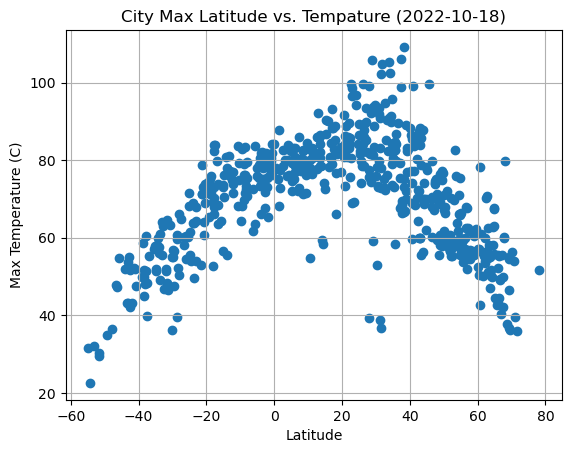

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Tempature (2022-10-18)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

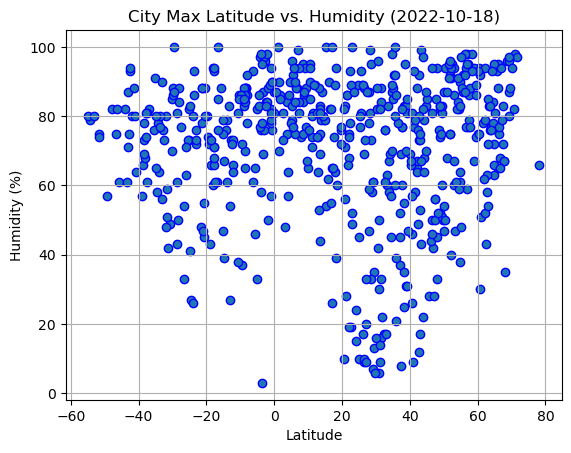

In [11]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "Blue")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [17]:
# Note: Experimenting with humidity mapping

# import hvplot.pandas
# city_data_df_test = city_data_df.hvplot.points(
#     "Lng",
#     "Lat",
#     geo = True,
#     tiles="OSM",
#     size = "Max Temp",
#     scale=0.5,
#     color = "Humidity",
#     hover_cols=['Max Temp', 'Wind Speed', 'Cloudiness'],
#     grid = True
# )
# # Display the map
# city_data_df_test


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Humidity,Max Temp,Wind Speed,Cloudiness)

#### Latitude Vs. Cloudiness

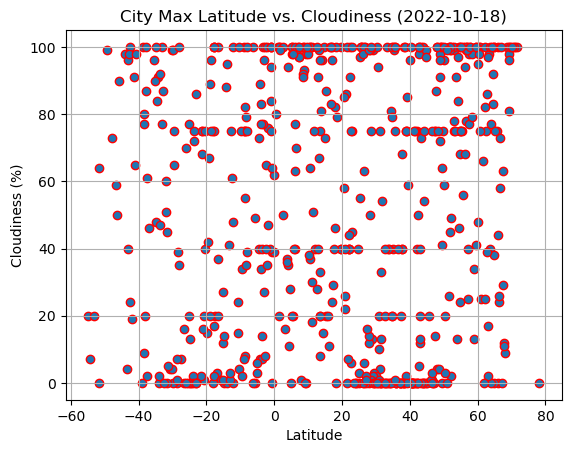

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "Red")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

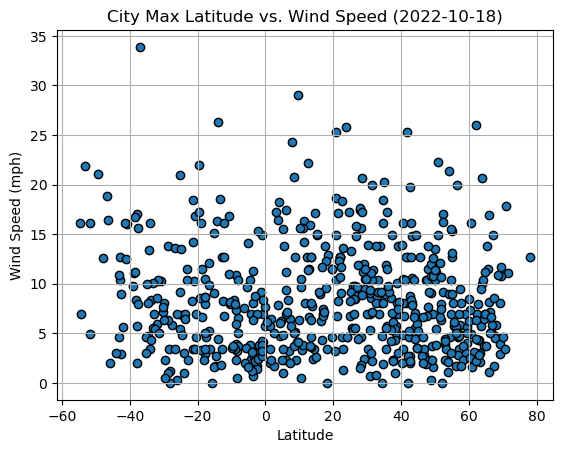

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "Black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots

def linreg(xvalue,yvalue,xlabel,ylabel,xcord,ycord):
    
    plt.scatter(xvalue, yvalue)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    (slope,intercept,r,p,stderr) = linregress(xvalue,yvalue)
    
    line = slope*xvalue + intercept
    
    plt.plot(xvalue, line, "r-")
    
    plt.annotate(f'y = {round(slope, 2)}x  + {round(intercept,2)}', (xcord,ycord), color = "red")
    print(f' The r value is: {r}')
    



In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,inda silase,14.1031,38.2829,59.29,87,96,2.42,ET,1689461040
5,bethel,41.3712,-73.4140,83.68,77,0,8.05,US,1689460877
6,udachny,66.4167,112.4000,44.46,75,24,7.14,RU,1689461041
7,changyon,38.2508,125.0961,73.18,83,100,1.01,KP,1689461041
8,morehead city,34.7229,-76.7260,84.25,87,20,16.11,US,1689460749


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <=0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,22.57,79,7,6.96,GS,1689460864
1,chonchi,-42.6128,-73.8092,42.12,93,24,2.95,CL,1689460971
2,port-aux-francais,-49.3500,70.2167,34.95,57,99,21.12,TF,1689460877
3,amahai,-3.3333,128.9167,80.01,87,100,3.15,ID,1689461039
9,mariental,-24.6333,17.9667,53.96,27,0,6.87,NaN,1689461042


###  Temperature vs. Latitude Linear Regression Plot

 The r value is: -0.6354582936504173


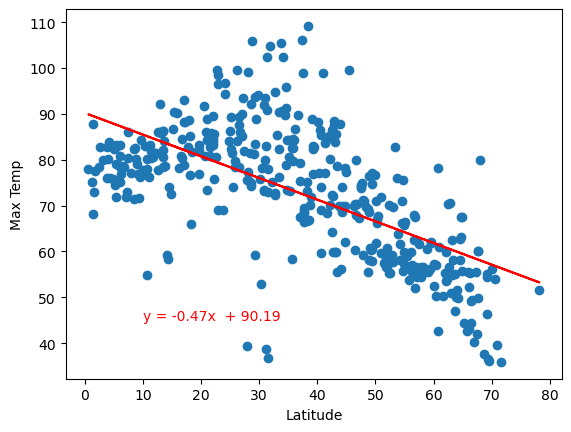

In [31]:
# Linear regression on Northern Hemisphere


linreg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Max Temp", 10, 45)

 The r value is: 0.8608791942621137


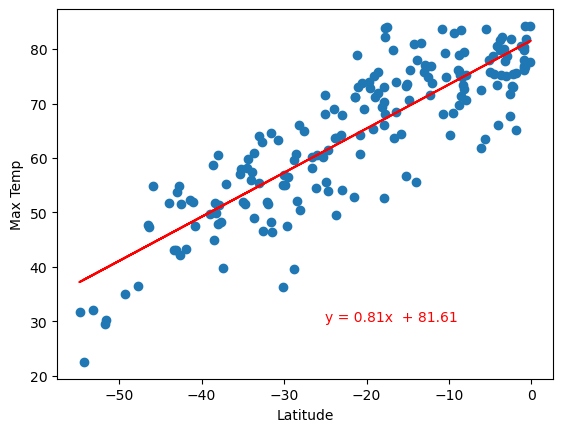

In [34]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Max Temp", -25, 30)

**Discussion about the linear relationship:** For the northern hemisphere there is an negetive correlation between Latitude and Max Temperature with a r value of -.64 For the southern hemisphere there is a positve correlation between Latitude and Max Temperature with a r value of 0.86

### Humidity vs. Latitude Linear Regression Plot

 The r value is: 0.030543084268890085


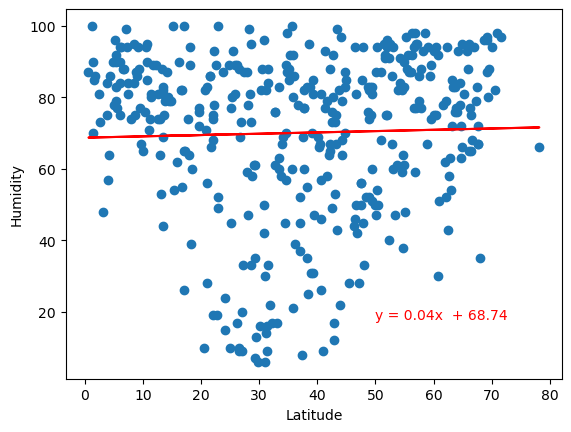

In [36]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity", 50, 18)

 The r value is: 0.08609519301415734


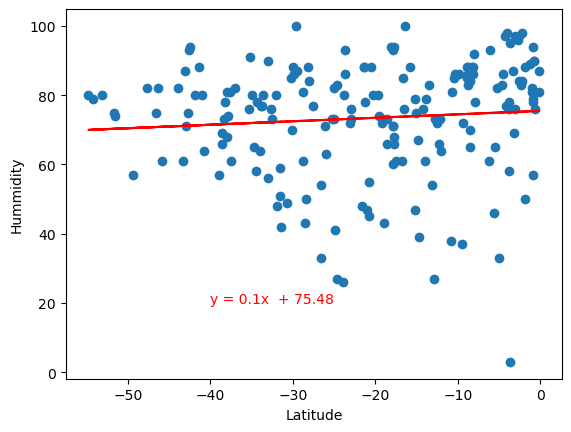

In [38]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Hummidity", -40, 20)

**Discussion about the linear relationship:** For the northern hemisphere there is barely any correlation between Latitude and Humidity with a r value of 0.03 For the southern hemisphere there wasn't a correlation between Latitude and Max Temperature either with a r value of 0.09 

### Cloudiness vs. Latitude Linear Regression Plot

 The r value is: 0.058498629277769866


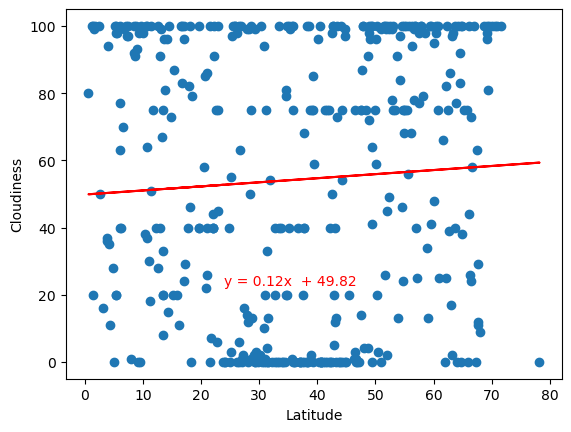

In [43]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", 24, 23)

 The r value is: 0.012980143518894946


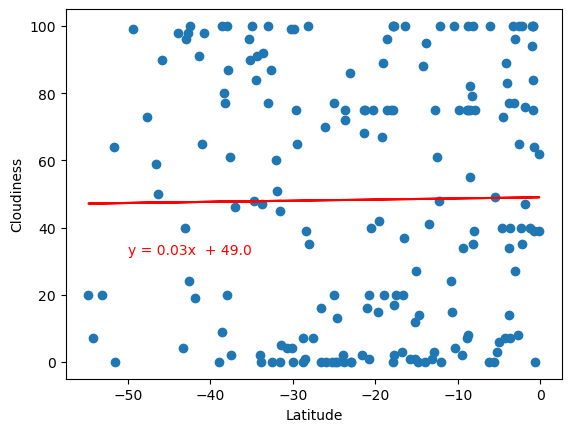

In [46]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", -50, 32)

It would be safe to say for the northern hemisphere there is no correlation between Latitude and Cloudiness with a r value of 0.06 For the southern hemisphere there wasn't a correlation between Latitude and Cloudiness either with a r value of 0.01. It may be a special circumstance with that dots that are close to the line

### Wind Speed vs. Latitude Linear Regression Plot

 The r value is: -0.10871278656416375


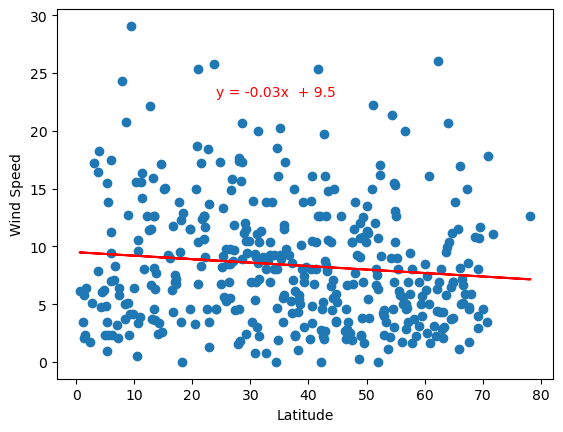

In [47]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", 24, 23)

 The r value is: -0.294596748091892


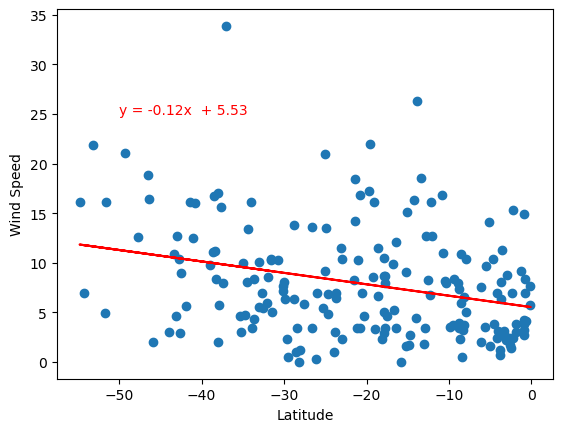

In [49]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", -50, 25)

**Discussion about the linear relationship:** With both Northern and Southern Hemisphere there is a negative correlation but it is a very minor correlationship.